<a href="https://colab.research.google.com/github/SeoMinJong/data_analysis/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC%EC%99%80_%EC%9B%8C%EB%93%9C_%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 워드클라우드 (영문)

#### 필요한 패키지 불러오기:

In [ ]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk                                   # Natural Language Tool Kit (영어).
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
from nltk.corpus import stopwords             # 불용어.
%matplotlib inline

In [ ]:
# 다음을 한번 실행한다!
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 데이터 읽어오기:

In [ ]:
# 구글 드라이브 마운트.
from google.colab import drive
drive.mount('/content/drive')  # 절차를 따라서 한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 경로 이동.
%cd "/content/drive/MyDrive/database"

/content/drive/MyDrive/database


In [ ]:
#f= open("../data/book_crime_and_punishment.txt",'r',encoding='UTF-8')
f = open("/content/drive/MyDrive/database/book_three_little_pigs.txt",'r',encoding='UTF-8')
my_book = f.readlines()
f.close()

#### 전처리:

In [ ]:
my_book[:1]

['THERE was an old sow with three little pigs, and as she had not enough to keep them, she sent them out to seek their fortune. The first that went off met a man with a bundle of straw, and said to him:\n']

In [ ]:
n_min = 4                                                           # 최소 단어 길이. 
corpus = []
for a_line in my_book:
    pre = re.sub('\W', ' ', a_line)                                # 특수문자 제외. # 문자열의 모든 요소가 절단되고 없애줘야 편리하다.
    pre = re.sub('_', ' ', pre)                                    # 특수문자 제외.
    pre = re.sub('\d+','', pre)                                    # 수자 제외. 
    pre = nltk.word_tokenize(pre)                                   # 단어 단위로 분절. # 모두 분절된 문자들을 단어단위로 분절 시킨다.
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [x.lower() for x in pre]                                  # 소문자화.  정규화 (Normalization).
    pre = [x for x in pre if x not in stopwords.words('english')+["would", "could", "looded", "thought", "shall", "without"]]   # 불용어 처리.
    corpus.extend(pre)                                                   # 단어를 말뭉치에 추가.

In [ ]:
corpus[:20]

['three',
 'little',
 'enough',
 'fortune',
 'first',
 'bundle',
 'straw',
 'please',
 'straw',
 'build',
 'house',
 'little',
 'built',
 'house',
 'presently',
 'along',
 'knocked',
 'little',
 'little',
 'answered']

#### 키워드 추출 (Option):

In [ ]:
# Series 로 변환.
my_series = pd.Series(corpus)

In [ ]:
# 도수 분포표. Top 10
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:20]

little        33
house         14
puffed         6
huffed         6
ready          5
frightened     4
coming         4
build          3
please         3
churn          3
chiny          3
built          3
bricks         3
apples         3
clock          3
butter         2
dinner         2
three          2
going          2
rolled         2
dtype: int64

In [ ]:
# 딕셔너리로 변환해 둔다.
my_dict = {}
for an_index, a_value in zip(my_word_counts.index,my_word_counts.values):
    my_dict[an_index] = a_value

#### 워드 클라우드 기본형 생성:

In [ ]:
# 다음은 워드클라우드의 요구사항.
# 하나의 문자열로 만들어 주는 방법
a_long_sentence = ' '.join(corpus)
len(a_long_sentence)

501009

In [ ]:
wc = WordCloud(background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
# wc.generate_from_frequencies(my_dict)                              # 딕셔너리에서 생성.
# wc.words_                                                          # 단어 사전 출력.


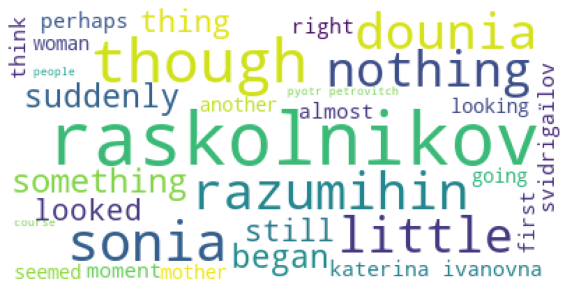

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

#### 워드 클라우드 마스크 사용형 생성:

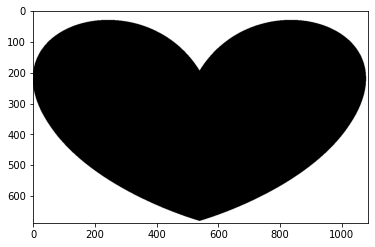

In [ ]:
# 백그라운드 마스크
# img = Image.open('/content/drive/MyDrive/database/background_1.png')                    # 타원형.
# img = Image.open('/content/drive/MyDrive/database/background_2.png')                   # 말풍선.
img = Image.open('/content/drive/MyDrive/database/background_3.png')                    # 하트.
# img = Image.open('/content/drive/MyDrive/database/option.png')                    # 톱니바퀴.
plt.imshow(img)
plt.show()
back_mask = np.array(img)

In [ ]:
wc = WordCloud(background_color='white', max_words=200, mask=back_mask)            # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence);                                                      # 긴 문자열에서 생성.
# wc.generate_from_frequencies(my_dict);                                            # 딕셔너리에서 생성.

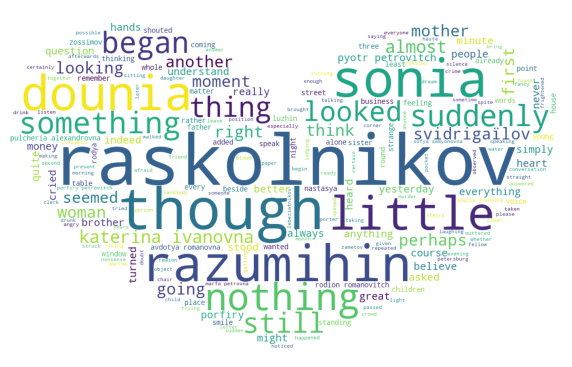

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")                                    # 축을 꺼줌.
plt.show()